# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Importing Modules and Libraries</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Loading Data</p>

In [2]:
data=pd.read_csv('/kaggle/input/insurance/insurance.csv')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Data Cleaning</p>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.duplicated().sum()

1

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.sample()

,age,sex,bmi,children,smoker,region,charges
90,21,female,39.49,0,no,southeast,2026.9741


In [7]:

oe=OrdinalEncoder(categories=[['male','female']])
gender=oe.fit_transform(data[['sex']])

In [8]:
oe=OrdinalEncoder(categories=[['yes','no']])
smoker1=oe.fit_transform(data[['smoker']])

In [9]:
oe=OrdinalEncoder(categories=[data.region.unique()])
region1=oe.fit_transform(data[['region']])

In [10]:
data['gender']=gender
data['En-Smoker']=smoker1
data['En-Region']=region1

In [11]:
data.describe()

,age,bmi,children,charges,gender,En-Smoker,En-Region
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.495138,0.795064,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,0.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


In [12]:
data.sample()

,age,sex,bmi,children,smoker,region,charges,gender,En-Smoker,En-Region
1119,30,female,19.95,3,no,northwest,5693.4305,1.0,1.0,2.0


In [13]:
x=data.drop(['sex','smoker','charges','region'],axis=1)
target=data.charges

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Correlation Visualization</p>

Text(0.5, 1.0, 'Correlation Between The Features')

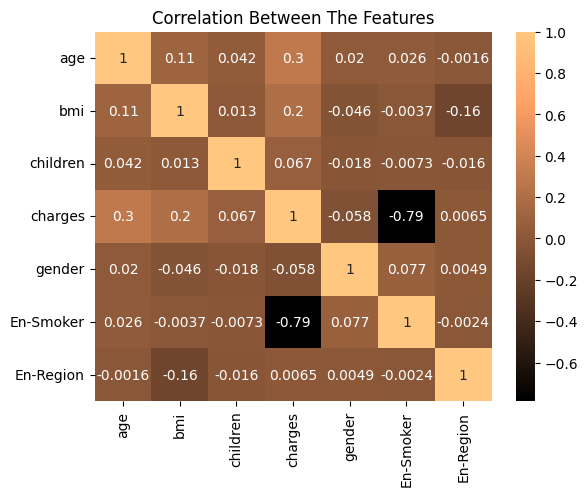

In [14]:
val=data.select_dtypes(include=['number'])
sb.heatmap(val.corr(),annot=True,cmap='copper')
plt.title('Correlation Between The Features')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Machine Learning</p>

In [15]:
poly=PolynomialFeatures(degree=2)

In [16]:
xval=poly.fit_transform(x)

In [17]:
model=LinearRegression()
model1=LinearRegression()

<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px;">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #e67e22; font-size: 140%; margin: 0;">Splitting Data</p>
</div>


In [18]:
xtra,xtest,ytra,ytest=train_test_split(xval,target,test_size=0.2)
xtra1,xtest1,ytra1,ytest1=train_test_split(x,target,test_size=0.2)

In [19]:
model.fit(xtra,ytra)

LinearRegression()

In [20]:
ypred=model.predict(xtest)

In [21]:
nonpoly=r2_score(ytest,ypred)

In [22]:
nonpolycross=cross_val_score(model,xval,target).mean()

In [23]:
mean_absolute_error(ytest,ypred)

2903.3922107462686

In [24]:
model1.fit(xtra1,ytra1)

LinearRegression()

In [25]:
ypred1=model1.predict(xtest1)

In [26]:
poly=r2_score(ytest1,ypred1)

In [27]:
polycross=cross_val_score(model1,x,target).mean()

In [28]:
mean_absolute_error(ytest1,ypred1)

4143.265244195225

In [29]:
model2=RandomForestRegressor()

In [30]:
model2.fit(xtra,ytra)


RandomForestRegressor()

In [31]:
ypred2=model2.predict(xtest)

In [32]:
nonpolyrandcross=cross_val_score(model2,xval,target).mean()

In [33]:
nonpolyrand=r2_score(ytest,ypred2)

In [34]:
model2.fit(xtra1,ytra1)
ypred22=model2.predict(xtest1)

In [35]:
polyrandcross=cross_val_score(model2,x,target).mean()

In [36]:
polyrand=r2_score(ytest1,ypred22)

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Results</p>

In [37]:
labels=['Non-Polynomial-Cross_val_score','Polynomial-Cross_val_score']
lval=[nonpolycross,nonpolyrandcross,polycross,polyrand]
labels1=['Non-Polynomial-r2_score','Polynomial-r2_score']
l1val=[nonpoly,poly,nonpolyrand,polyrand]
cat=['Linear_Regression','Random_Forest']
table=pd.DataFrame({labels[0]:lval[:2],labels[1]:lval[2:],labels1[0]:l1val[:2],labels1[1]:l1val[2:],"Category":cat})
table.set_index('Category')

,Non-Polynomial-Cross_val_score,Polynomial-Cross_val_score,Non-Polynomial-r2_score,Polynomial-r2_score
Category,,,,
Linear_Regression,0.695738,0.747129,0.836756,0.850248
Random_Forest,0.835473,0.832331,0.729866,0.832331


<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px;">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #e67e22; font-size: 140%; margin: 0;">Linear Regression Result</p>
</div>


In [38]:
table.iloc[0]

Non-Polynomial-Cross_val_score             0.695738
Polynomial-Cross_val_score                 0.747129
Non-Polynomial-r2_score                    0.836756
Polynomial-r2_score                        0.850248
Category                          Linear_Regression
Name: 0, dtype: object

<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px;">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #e67e22; font-size: 140%; margin: 0;">Random Forest Regressor Result</p>
</div>


In [39]:
table.iloc[1]

Non-Polynomial-Cross_val_score         0.835473
Polynomial-Cross_val_score             0.832331
Non-Polynomial-r2_score                0.729866
Polynomial-r2_score                    0.832331
Category                          Random_Forest
Name: 1, dtype: object

<div style="border-radius: 10px; border: rgb(41, 128, 185) solid; padding: 15px; background-color: rgb(52, 73, 94); font-size: 100%; text-align: left; color: #ecf0f1; box-shadow: 0 0 15px rgba(41, 128, 185, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>Polynomial Cross Validation Score of Random Forest Regression is Robust</strong></li>
    </ul>
</div>


<div style="border-radius: 10px; border: 2px solid #e5e4e2; padding: 15px; background-color: #333; font-size: 120%; text-align: center; color: #E5E4E2; box-shadow: 0 0 15px rgba(229, 228, 226, 0.7);">
    <p style="margin: 0; font-weight: bold; font-size: 150%; color: #E5E4E2;">Thank You</p>
    <p style="margin: 10px 0 20px;color: #E5E4E2">Wishing you a day filled with elegance and positivity!</p>
    <p style="margin: 0;color: #E5E4E2">Discover the sophisticated content we have prepared for you.</p>
</div>
